In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

food_consumption = pd.read_csv('Datasets/food_consumption.csv')

In [3]:
food_consumption.columns

Index(['Unnamed: 0', 'country', 'food_category', 'consumption',
       'co2_emission'],
      dtype='object')

# Variance and Standard Deviation


* Calculate the variance and standard deviation of co2_emission for each food_category with the .groupby() and .agg() methods; compare the values of variance and standard deviation.
* Create a histogram of co2_emission for the beef in food_category and show the plot.
* Create a histogram of co2_emission for the eggs in food_category and show the plot.


In [4]:
food_consumption.groupby("food_category")['co2_emission'].agg(['var','std'])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


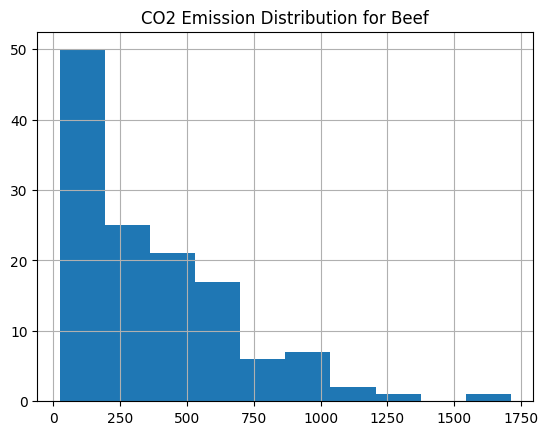

In [7]:
# Create a new figure
plt.figure()
# Create histogram
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Add a title to make it clear what we're plotting
plt.title('CO2 Emission Distribution for Beef')
# Display the plot
plt.show()

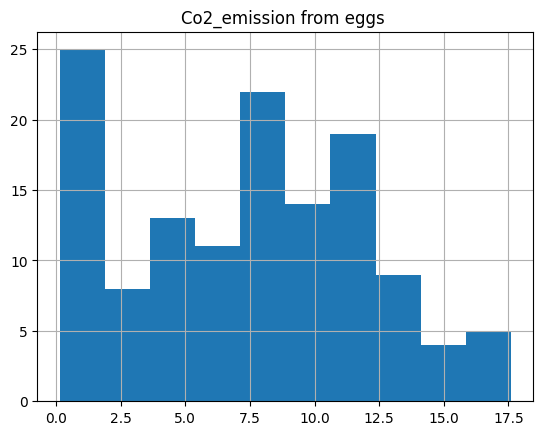

In [9]:
plt.figure()
food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
plt.title("Co2_emission from eggs ")
plt.show()

# Quartiles, quantiles, and quintiles


* Calculate the quartiles of the co2_emission column of food_consumption.
* Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
* Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).


In [11]:
np.quantile(food_consumption['co2_emission'],np.linspace(0,1,5))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [12]:
np.quantile(food_consumption['co2_emission'],np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [13]:
np.quantile(food_consumption['co2_emission'],np.linspace(0,1,11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

# Finding outliers using IQR

* Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country

In [14]:
food_consumption.groupby('country')['co2_emission'].sum()

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [15]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# Day 18

In [ ]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,min_time,max_time) - uniform.cdf(10,min_time,max_time)
print(prob_between_10_and_20)

# Day 19

In [ ]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3,0.3,size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.3,size=52)

# Print mean deals won per week
print(np.sum(deals)/52)

In [ ]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1- binom.cdf(1,3,0.3)

print(prob_greater_than_1)

# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3*0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3*0.35
print(won_35pct)